### Введение в нейронные сети
##### Домашнее задание 2

Используем набор примеров fashion-MNIST

   1. Опишите - какой результата получен в нейросети в зависимости от:
      - числа нейронов в слое(для 2-хслойной сети),
      - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
      - фиксируйте для тренировочного и тестового набора метрики accuracy.

   2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

   3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

   4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.



In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


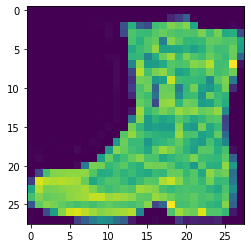

9


In [3]:
plt.imshow(train_imagesi[150,:,:])
plt.show()
print(train_labels[150])

Epoch 1/15
80/80 [==============================] - 1s 8ms/step - loss: 1.2115 - accuracy: 0.7036 - val_loss: 0.8290 - val_accuracy: 0.7946
Epoch 2/15
80/80 [==============================] - 1s 9ms/step - loss: 0.7104 - accuracy: 0.8117 - val_loss: 0.6179 - val_accuracy: 0.8266
Epoch 3/15
80/80 [==============================] - 1s 11ms/step - loss: 0.5597 - accuracy: 0.8392 - val_loss: 0.5240 - val_accuracy: 0.8418
Epoch 4/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4826 - accuracy: 0.8524 - val_loss: 0.4773 - val_accuracy: 0.8468
Epoch 5/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4362 - accuracy: 0.8619 - val_loss: 0.4439 - val_accuracy: 0.8518
Epoch 6/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4054 - accuracy: 0.8681 - val_loss: 0.4178 - val_accuracy: 0.8612
Epoch 7/15
80/80 [==============================] - 1s 10ms/step - loss: 0.3792 - accuracy: 0.8742 - val_loss: 0.3976 - val_accuracy: 0.8670
Epoch 8/15
80/8

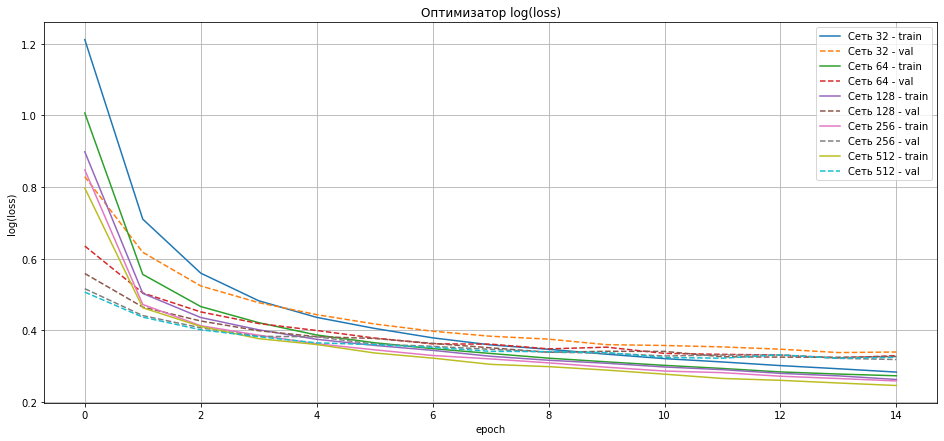

In [4]:
# Двуслойная модель

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
  # Build the model.
  model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
  ])

  # Compile the model.
  model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history2 = model2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
  )

  # накопление результатов
  model_name = f'Сеть {neuron_num} нейрона'
  model_accuracy = history2.history['accuracy'][epochs-1]
  model_val_accuracy = history2.history['val_accuracy'][epochs-1]
  result2.append([model_name,model_accuracy, model_val_accuracy])

  # картинки
  plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
  plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')

plt.legend()
plt.grid('On')
plt.title('Оптимизатор log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [5]:
# соберем accuracy для наглядности
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False)

,model_name,model_accuracy,model_val_accuracy
3,Сеть 256 нейрона,0.906021,0.884667
4,Сеть 512 нейрона,0.911479,0.884583
1,Сеть 64 нейрона,0.902875,0.881417
2,Сеть 128 нейрона,0.905187,0.880583
0,Сеть 32 нейрона,0.901958,0.880333


В данном случае увеличив ширину слоя - повысили точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 256 нейронах в скрытом слое.


In [6]:
result_dense = []

# Build the model.
model2_256 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='sigmoid'), # Скрытый слой из 256 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model2_256.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2_256 = model2_256.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores2_256 = model2_256.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'Двуслойная сеть'
mod_accuracy = history2_256.history['accuracy'][epochs-1]
mod_val_accuracy = history2_256.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_256[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 15ms/step - loss: 0.8475 - accuracy: 0.7227 - val_loss: 0.5182 - val_accuracy: 0.8176
Epoch 2/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4688 - accuracy: 0.8346 - val_loss: 0.4474 - val_accuracy: 0.8403
Epoch 3/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4123 - accuracy: 0.8542 - val_loss: 0.4016 - val_accuracy: 0.8562
Epoch 4/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3799 - accuracy: 0.8657 - val_loss: 0.3919 - val_accuracy: 0.8562
Epoch 5/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3578 - accuracy: 0.8731 - val_loss: 0.3760 - val_accuracy: 0.8629
Epoch 6/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3444 - accuracy: 0.8752 - val_loss: 0.3679 - val_accuracy: 0.8676
Epoch 7/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3298 - accuracy: 0.8809 - val_loss: 0.3606 - val_accuracy: 0.8683
Epoch 8/15
80

In [7]:
# Трехслойная модель

model3 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'Трехслойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 8ms/step - loss: 1.0422 - accuracy: 0.6823 - val_loss: 0.6323 - val_accuracy: 0.7897
Epoch 2/15
80/80 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.8215 - val_loss: 0.4868 - val_accuracy: 0.8358
Epoch 3/15
80/80 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.8489 - val_loss: 0.4354 - val_accuracy: 0.8523
Epoch 4/15
80/80 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.8632 - val_loss: 0.3987 - val_accuracy: 0.8633
Epoch 5/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3713 - accuracy: 0.8720 - val_loss: 0.3811 - val_accuracy: 0.8692
Epoch 6/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.8792 - val_loss: 0.3666 - val_accuracy: 0.8715
Epoch 7/15
80/80 [==============================] - 1s 7ms/step - loss: 0.3286 - accuracy: 0.8844 - val_loss: 0.3567 - val_accuracy: 0.8757
Epoch 8/15
80/80 [==

In [8]:
# Пятислойная модель

model5 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model5.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'Пятислойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 8ms/step - loss: 0.9544 - accuracy: 0.7157 - val_loss: 0.5696 - val_accuracy: 0.8156
Epoch 2/15
80/80 [==============================] - 1s 7ms/step - loss: 0.4894 - accuracy: 0.8414 - val_loss: 0.4430 - val_accuracy: 0.8539
Epoch 3/15
80/80 [==============================] - 1s 9ms/step - loss: 0.4078 - accuracy: 0.8637 - val_loss: 0.4064 - val_accuracy: 0.8621
Epoch 4/15
80/80 [==============================] - 1s 14ms/step - loss: 0.3721 - accuracy: 0.8710 - val_loss: 0.3996 - val_accuracy: 0.8588
Epoch 5/15
80/80 [==============================] - 1s 16ms/step - loss: 0.3427 - accuracy: 0.8797 - val_loss: 0.3730 - val_accuracy: 0.8675
Epoch 6/15
80/80 [==============================] - 1s 16ms/step - loss: 0.3227 - accuracy: 0.8872 - val_loss: 0.3493 - val_accuracy: 0.8747
Epoch 7/15
80/80 [==============================] - 1s 15ms/step - loss: 0.3030 - accuracy: 0.8938 - val_loss: 0.3449 - val_accuracy: 0.8782
Epoch 8/15
80/80

In [9]:
# Десятислойная модель

model10 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), 
  Dense(256, activation='tanh'),
  Dense(128, activation='relu'),
  Dense(64, activation='sigmoid'),
  Dense(64, activation='relu'),
  Dense(64, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(256, activation='relu'),
  Dense(110, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history10 = model10.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'Десятислойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 15ms/step - loss: 1.2141 - accuracy: 0.5310 - val_loss: 0.6699 - val_accuracy: 0.7516
Epoch 2/15
80/80 [==============================] - 1s 16ms/step - loss: 0.5698 - accuracy: 0.7971 - val_loss: 0.5126 - val_accuracy: 0.8191
Epoch 3/15
80/80 [==============================] - 2s 20ms/step - loss: 0.4781 - accuracy: 0.8366 - val_loss: 0.4667 - val_accuracy: 0.8385
Epoch 4/15
80/80 [==============================] - 2s 21ms/step - loss: 0.4185 - accuracy: 0.8557 - val_loss: 0.4421 - val_accuracy: 0.8434
Epoch 5/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3854 - accuracy: 0.8673 - val_loss: 0.4048 - val_accuracy: 0.8594
Epoch 6/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3577 - accuracy: 0.8766 - val_loss: 0.3819 - val_accuracy: 0.8687
Epoch 7/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3390 - accuracy: 0.8817 - val_loss: 0.3742 - val_accuracy: 0.8689
Epoch 8/15
80

Text(0.5, 1.0, 'Потери от эпох')

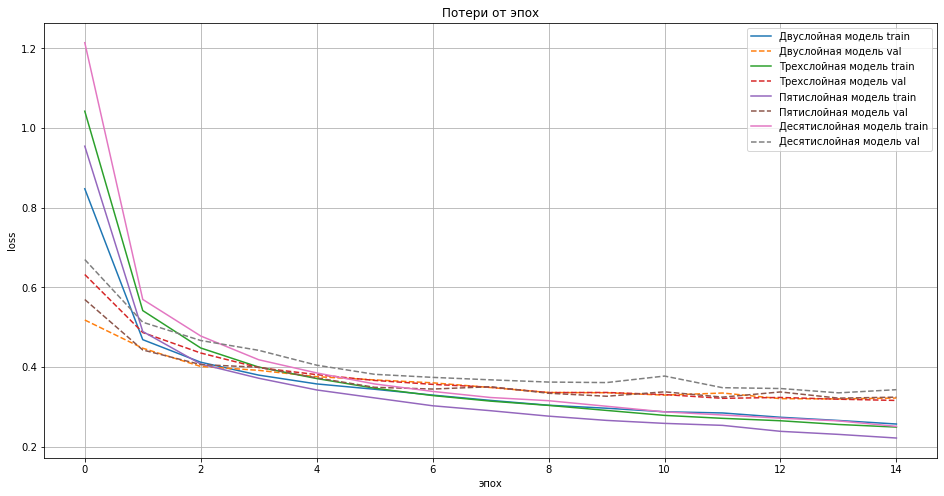

In [10]:


plt.figure(figsize=(16, 8))

plt.plot(history2_256.history['loss'],'-', label='Двуслойная модель train')
plt.plot(history2_256.history['val_loss'],'--', label='Двуслойная модель val')
plt.plot(history3.history['loss'],'-', label='Трехслойная модель train')
plt.plot(history3.history['val_loss'],'--', label='Трехслойная модель val')
plt.plot(history5.history['loss'],'-', label='Пятислойная модель train')
plt.plot(history5.history['val_loss'],'--', label='Пятислойная модель val')
plt.plot(history10.history['loss'],'-', label='Десятислойная модель train')
plt.plot(history10.history['val_loss'],'--', label='Десятислойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')



Text(0.5, 1.0, 'Accuracy от эпох')

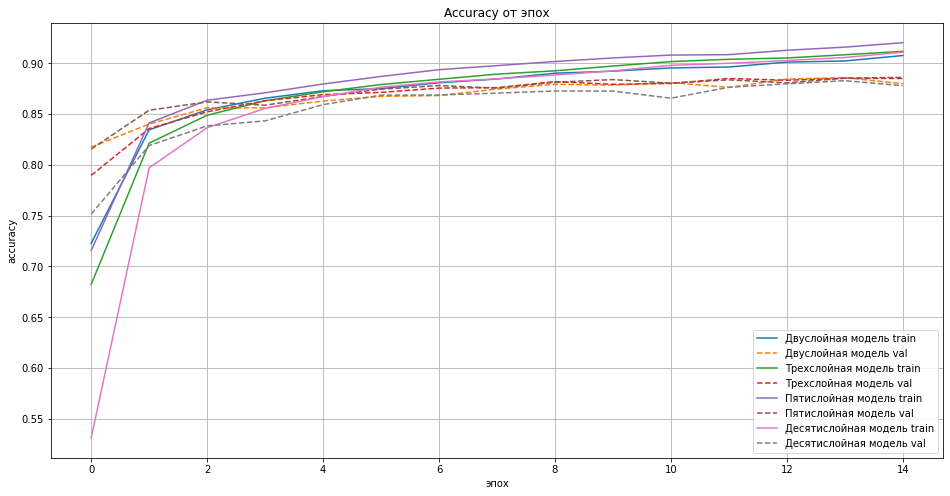

In [11]:


plt.figure(figsize=(16, 8))

plt.plot(history2_256.history['accuracy'],'-', label='Двуслойная модель train')
plt.plot(history2_256.history['val_accuracy'],'--', label='Двуслойная модель val')
plt.plot(history3.history['accuracy'],'-', label='Трехслойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label='Трехслойная модель val')
plt.plot(history5.history['accuracy'],'-', label='Пятислойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label='Пятислойная модель val')
plt.plot(history10.history['accuracy'],'-', label='Десятислойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label='Десятислойная модель val')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy от эпох')



In [12]:
# соберем accuracy для наглядности
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
2,Пятислойная сеть,0.920417,0.886250,0.8793
1,Трехслойная сеть,0.911896,0.885167,0.8780
0,Двуслойная сеть,0.907771,0.880000,0.8719
3,Десятислойная сеть,0.911000,0.878083,0.8717


##### Лучшую точность показала пятислойная модель

##### работа разных оптимизаторов (SGD, Adam, RMSProp)

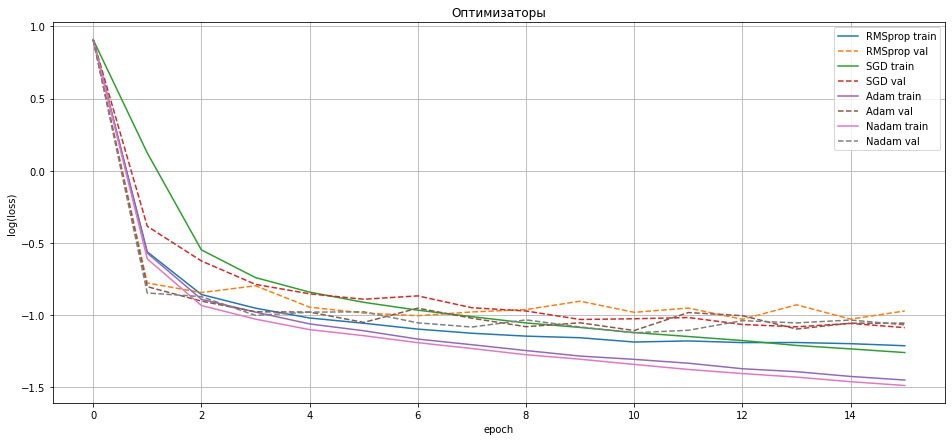

In [13]:
# создаем модель model
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='relu'),
                      Dense(256, activation='tanh'),
                      Dense(128, activation='tanh'),
                      Dense(64, activation='sigmoid'),
                      Dense(10, activation='softmax'),
                      ])
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )

  # накопление результатов
  method_name = modeli.optimizer.get_config()['name']
  method_accuracy = hh.history['accuracy'][14]
  method_val_accuracy = hh.history['val_accuracy'][14]
  result.append([method_name,method_accuracy, method_val_accuracy])

  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')

plt.legend()
plt.grid('On')
plt.title('Оптимизаторы')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [14]:
pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.917333,0.882167
2,Adam,0.913792,0.881333
1,SGD,0.898833,0.878667
0,RMSprop,0.895000,0.876583


In [15]:
modeli.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

Качество классификации в нейросети на тестовом наборе помогла улучшить настройка архитектуры модели:

   - подбор ширины скрытого слоя
   - подбор количества слоев
   - подбор оптимизатора

Посмотрим предсказанные значения

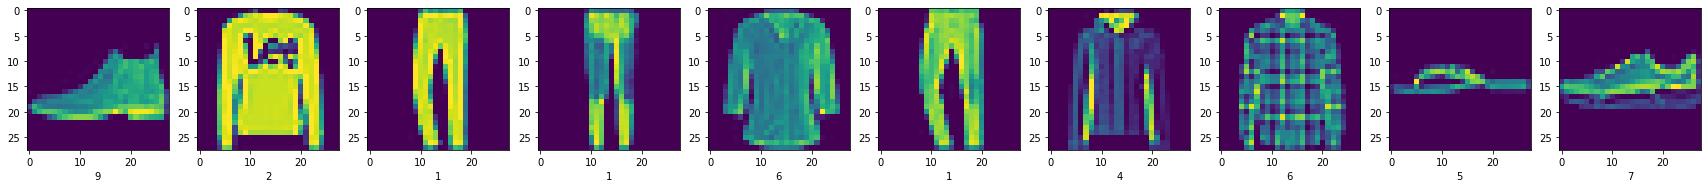

In [16]:
N = 10
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()

In [17]:
y_pred_class

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [19]:
test_pred = np.argmax(modeli.predict(test_images), axis=1)
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.84      0.80      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.82      0.80      1000
           5       0.95      0.96      0.95      1000
           6       0.73      0.66      0.69      1000
           7       0.93      0.93      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [20]:
print(confusion_matrix(test_labels, test_pred))

[[850   0  21  15   4   2  99   0   9   0]
 [  7 967   0  15   5   0   5   0   1   0]
 [ 19   0 836  10  77   0  56   0   2   0]
 [ 35   7  19 864  41   1  28   0   5   0]
 [  0   0 110  24 820   0  41   0   5   0]
 [  0   0   0   0   0 961   0  31   0   8]
 [117   1 101  26  89   0 657   0   9   0]
 [  0   0   0   0   0  25   0 933   0  42]
 [  6   0   2   6   3   6  13   5 959   0]
 [  0   0   0   0   0  19   0  31   0 950]]


In [21]:
model.save_weights('model.h5')